# PCA Plots

## General settings and loading files

In [3]:
%%time

% matplotlib inline
% load_ext autoreload
% autoreload 2

% run general_settings.py
# ^ Takes ~20s to run if it finds the dumpfiles
# ^ WARNING: It will hog ~2.02 Gb RAM

% run datasets_settings.py

! echo; wc -l /home/juan/tesina/dataset_dumps/*.samples | grep -v total

[16:18:23] 'panels' dict
[16:18:23] 'galanter', 'present', 'missing' dataframes
[16:18:23] 'panel_labels'
[16:18:23] 'panel_names' dict
[16:18:23] 'panel_rsIDs' dict
[16:18:23] 'genome' dataframe
[16:18:38] 'lat' dataframe
[16:19:07] 'control_genotypes' huge datagrame
[16:19:07] 'control_rsIDs' dict to filter it ^
[16:19:07] 'cp_factors' list
[16:19:07] 'control_labels'
[16:19:07] 'control_names' dict
[16:19:07] 'df_1000G_samples'
[16:19:07] 'df_1000G_SNPs'
[16:19:07] 'df_1000G_genotypes'
[16:19:07] 'df_1000G_populations'
[16:19:07] 'df_1000G_genotypes_alleles'

/home/juan/repos/tesina/panels/genome.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  centromers["chromosome"] = [i.replace("CEN", "") for i in centromers.index]
/home/juan/miniconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1572: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())



[16:19:08] 'mafs' dataframe
[16:19:08] 'dataset_names'
[16:19:08] 'dataset_populations'
[16:19:08] 'dataset_samples' created and written to files
[16:19:22] 'ancestries_df' read from ADMIXTURE results

  346 /home/juan/tesina/dataset_dumps/L.samples
  544 /home/juan/tesina/dataset_dumps/LE.samples
  751 /home/juan/tesina/dataset_dumps/LEA.samples
  959 /home/juan/tesina/dataset_dumps/LEAC.samples
 1062 /home/juan/tesina/dataset_dumps/LEACI.samples
CPU times: user 42.8 s, sys: 15 s, total: 57.8 s
Wall time: 59.1 s


/home/juan/miniconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1574: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


## Create the datasets
Lists of sample IDs of chosen populations to later filter 1000 Genomes data.

## PCA plots

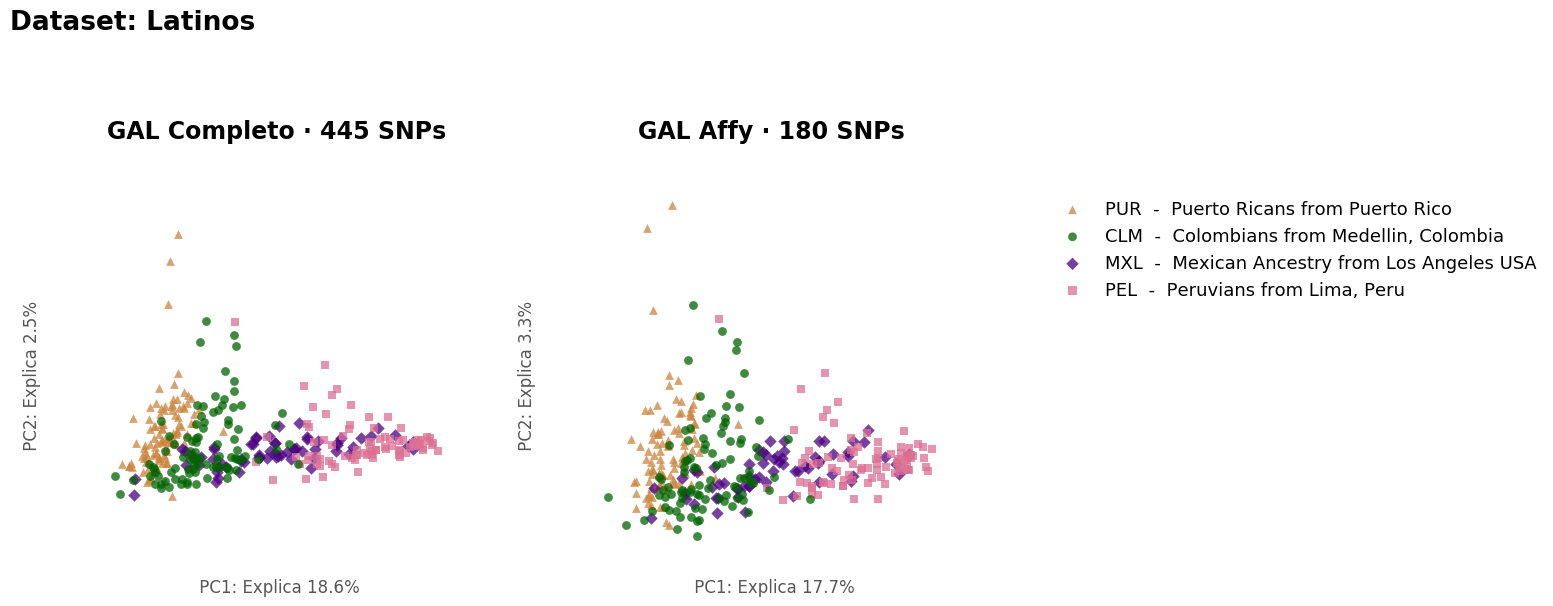

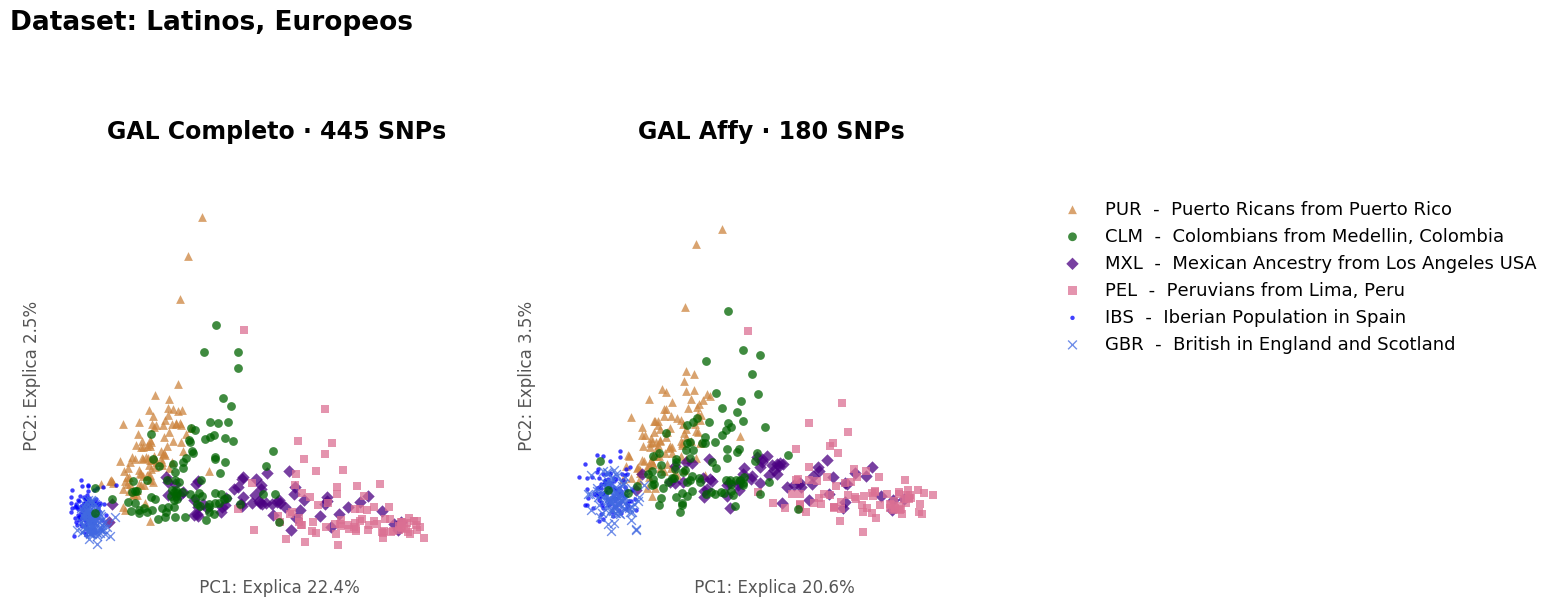

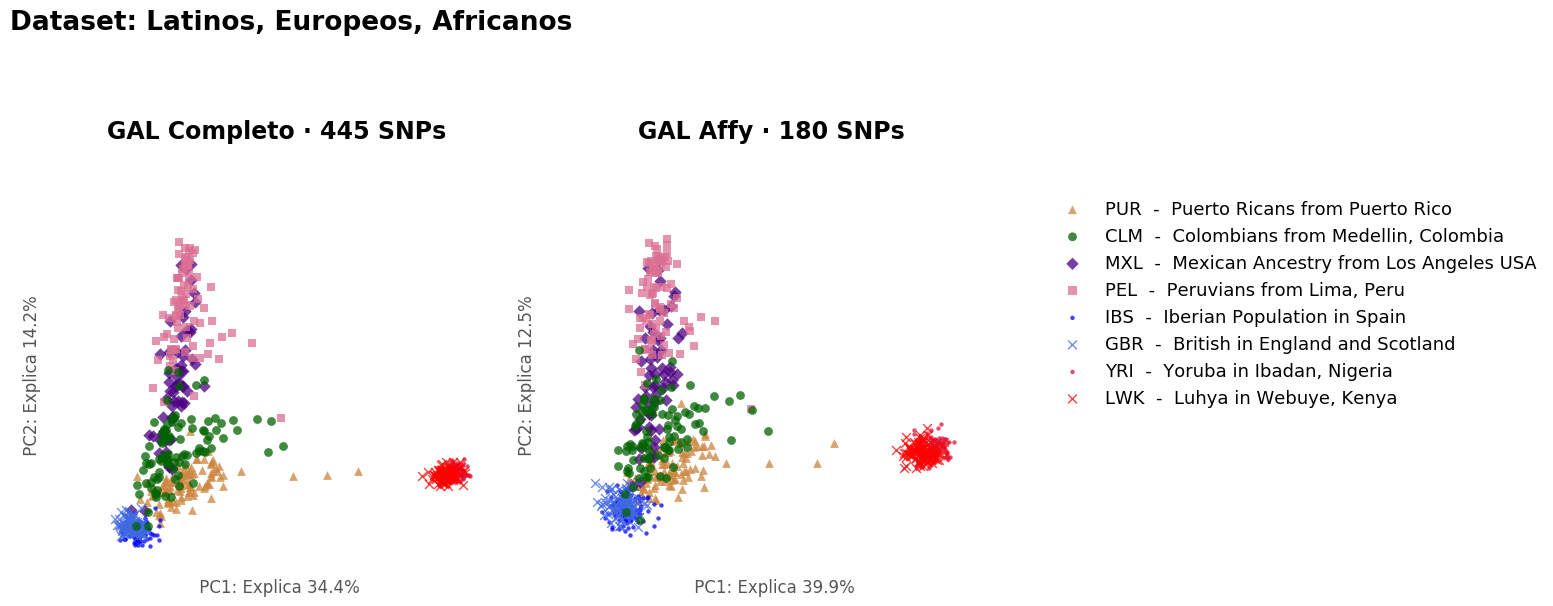

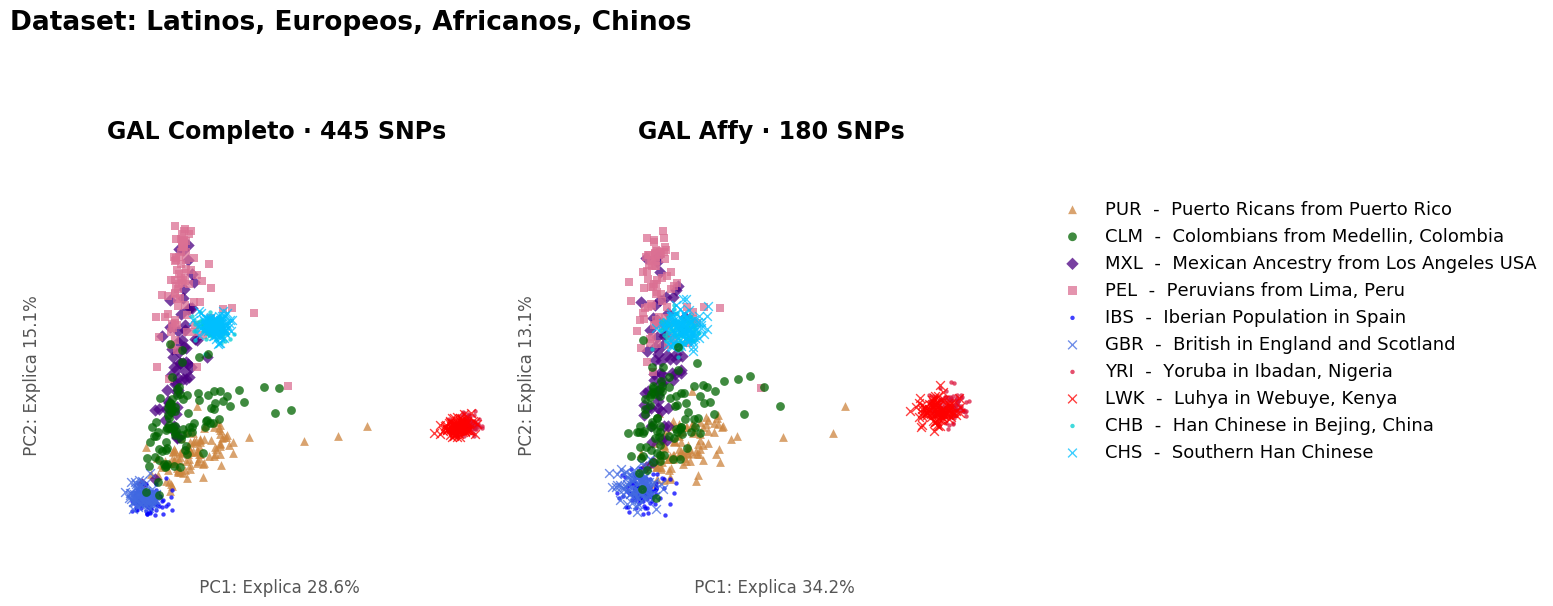

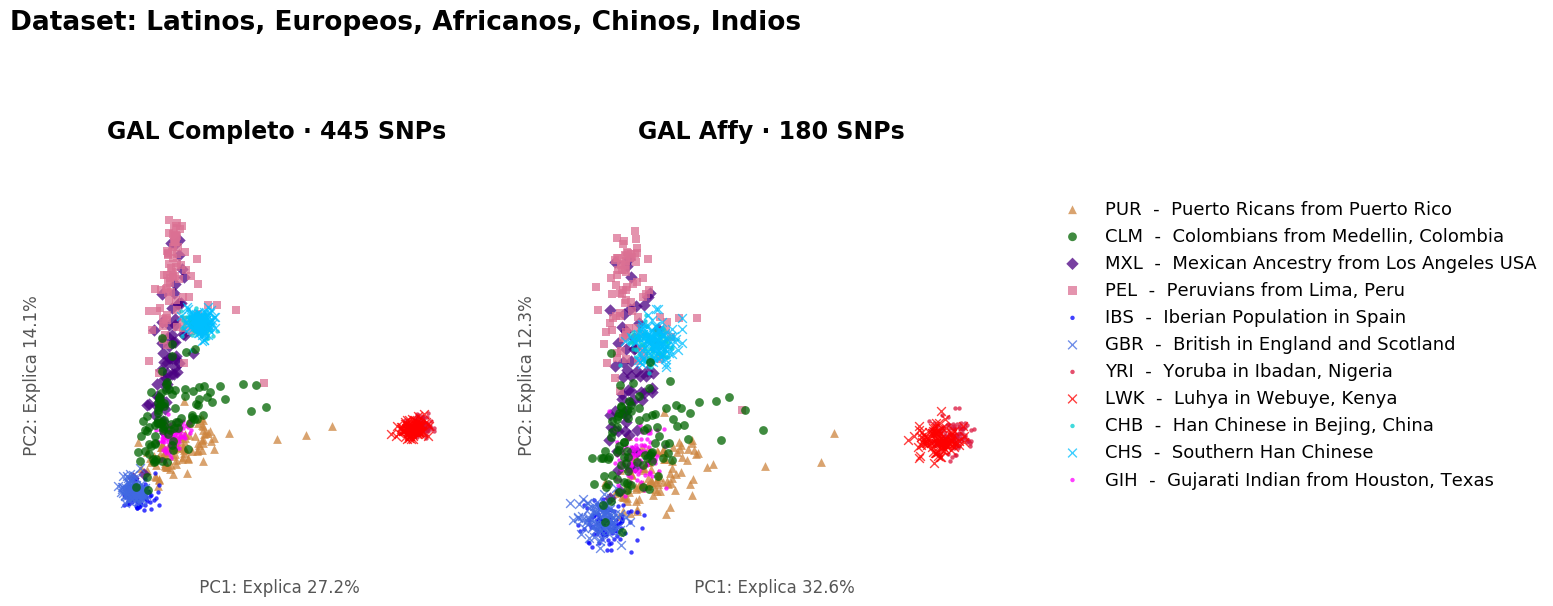

In [45]:
# %%time

# == WARNING ==
# This cell will take ~4m to execute

from plotters.pca import PCAPlotter

pca_plotter = PCAPlotter()
components_to_compare = [("PC1", "PC2")]

def make_filename(dataset_label, panel_labels, components_to_compare):
    return "{}__{}__PCx{}".format(dataset_label,
                                "_".join(panel_labels),
                             len(components_to_compare) * 2)

for dataset_label, sample_ids in dataset_samples.items():
    
    
    fig_title = "Dataset: {}".format(dataset_names[dataset_label])

    # GAL Panels
    filename = make_filename(dataset_label, panel_labels, components_to_compare)
    populations_to_plot = dataset_populations[dataset_label]  # Order to the plot!
    pca_plotter.plot(fig_title, panel_rsIDs, df_1000G_genotypes, df_1000G_samples.ix[sample_ids],
                     components_to_compare, panel_names, filename,
                     populations_to_plot)

#     # Control Panels
#     dataset_genotypes = control_genotypes.loc[sample_ids, :]
#     filename = make_filename(dataset_label, control_labels, components_to_compare)
#     populations_to_plot = dataset_populations[dataset_label]  # Order to the plot!
#     pca_plotter.plot(fig_title, control_rsIDs, df_1000G_genotypes, df_1000G_samples.ix[sample_ids],
#                      components_to_compare, control_names, filename,
#                      populations_to_plot)
    
#     # Control Panels - Extra components
#     only_big_cp = {"CPx100": control_rsIDs["CPx100"]}
#     more_components_to_compare = [("PC3", "PC4"), ("PC5", "PC6"),
#                                   ("PC7", "PC8")]
#     dataset_genotypes = control_genotypes.loc[sample_ids, :]
#     populations_to_plot = dataset_populations[dataset_label]  # Order to the plot!
#     filename = make_filename(dataset_label, ["100"], more_components_to_compare)
#     pca_plotter.plot(fig_title, only_big_cp, df_1000G_genotypes, df_1000G_samples.ix[sample_ids],
#                      more_components_to_compare, control_names, filename,
#                      populations_to_plot)

## Generate subpanels from GAL_Affy to check the dispersion of the clusters

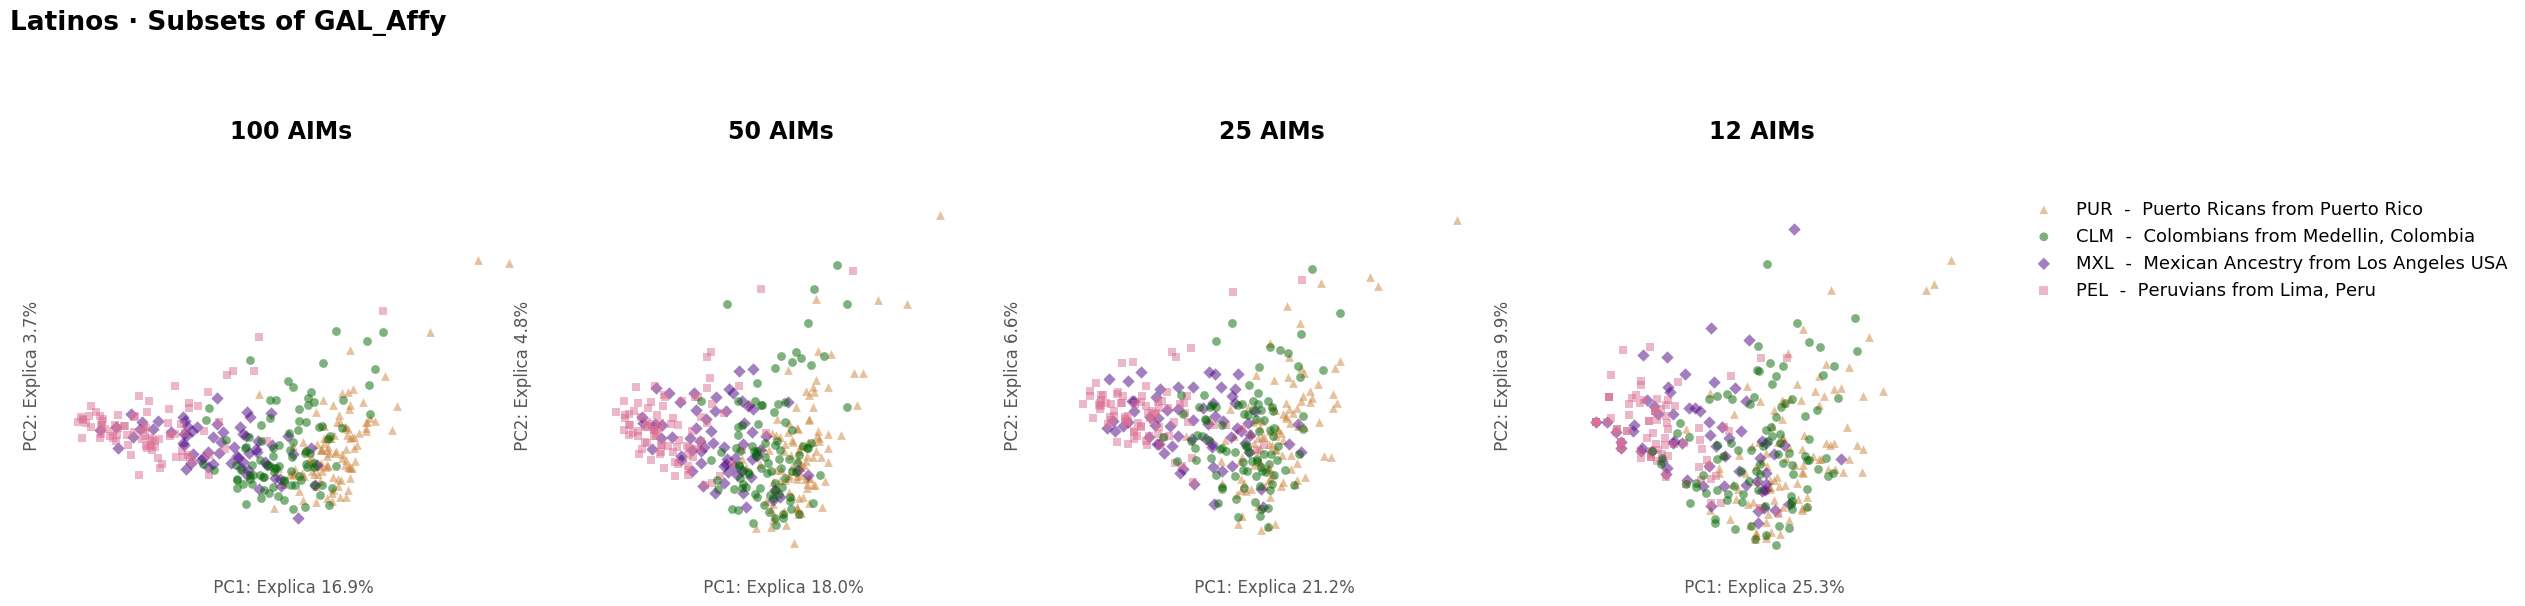

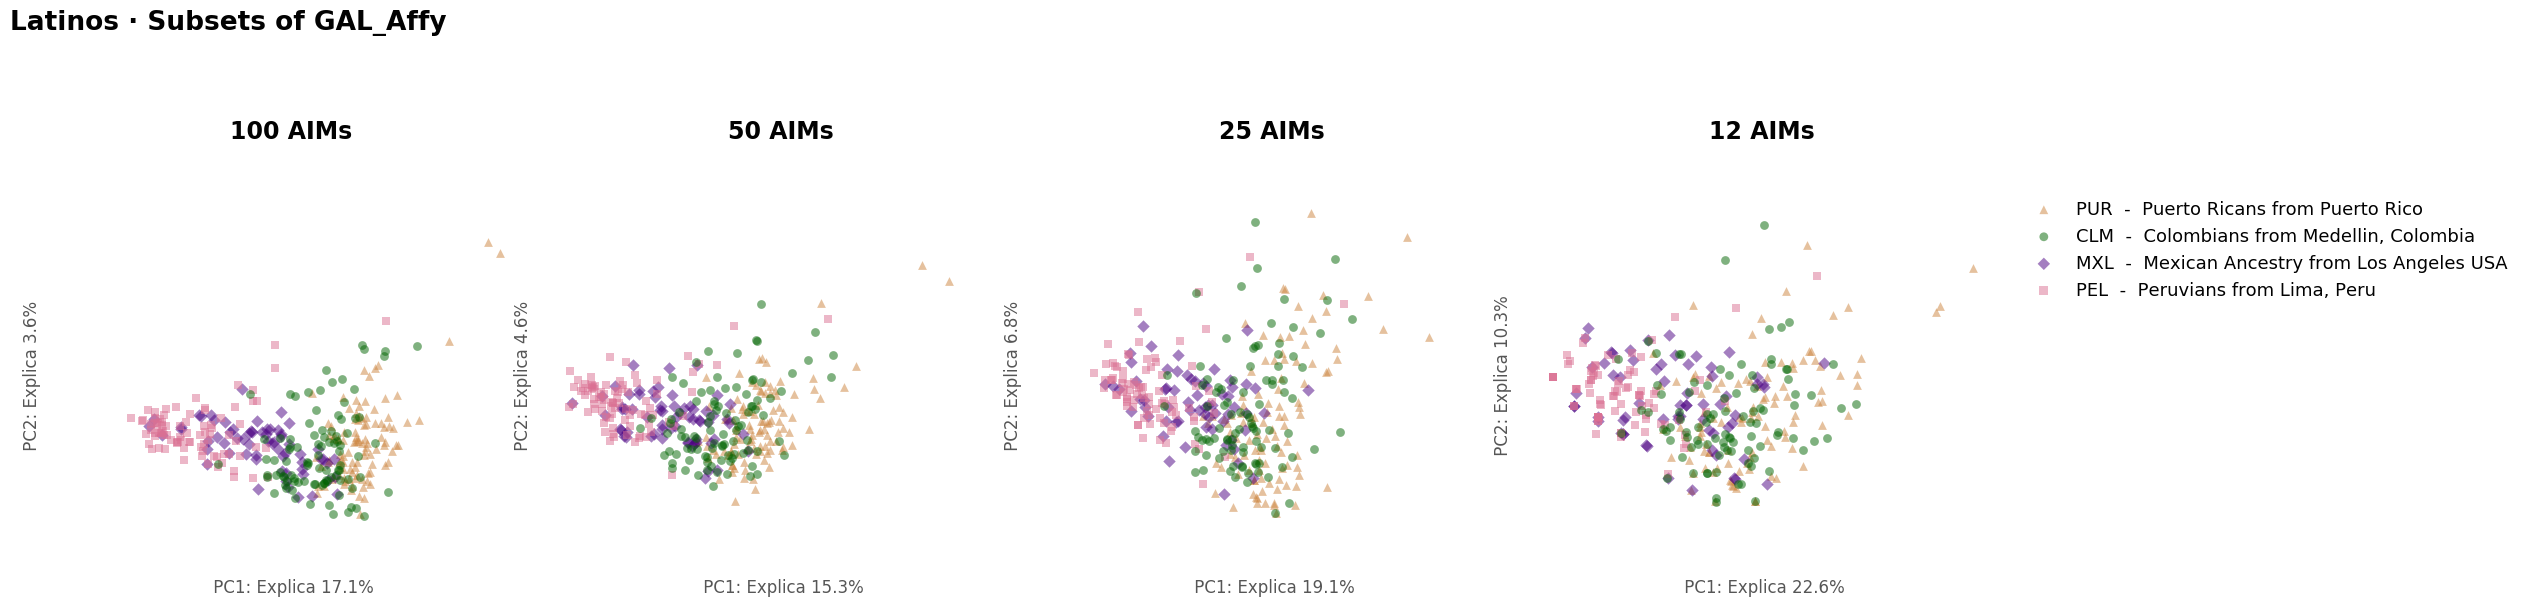

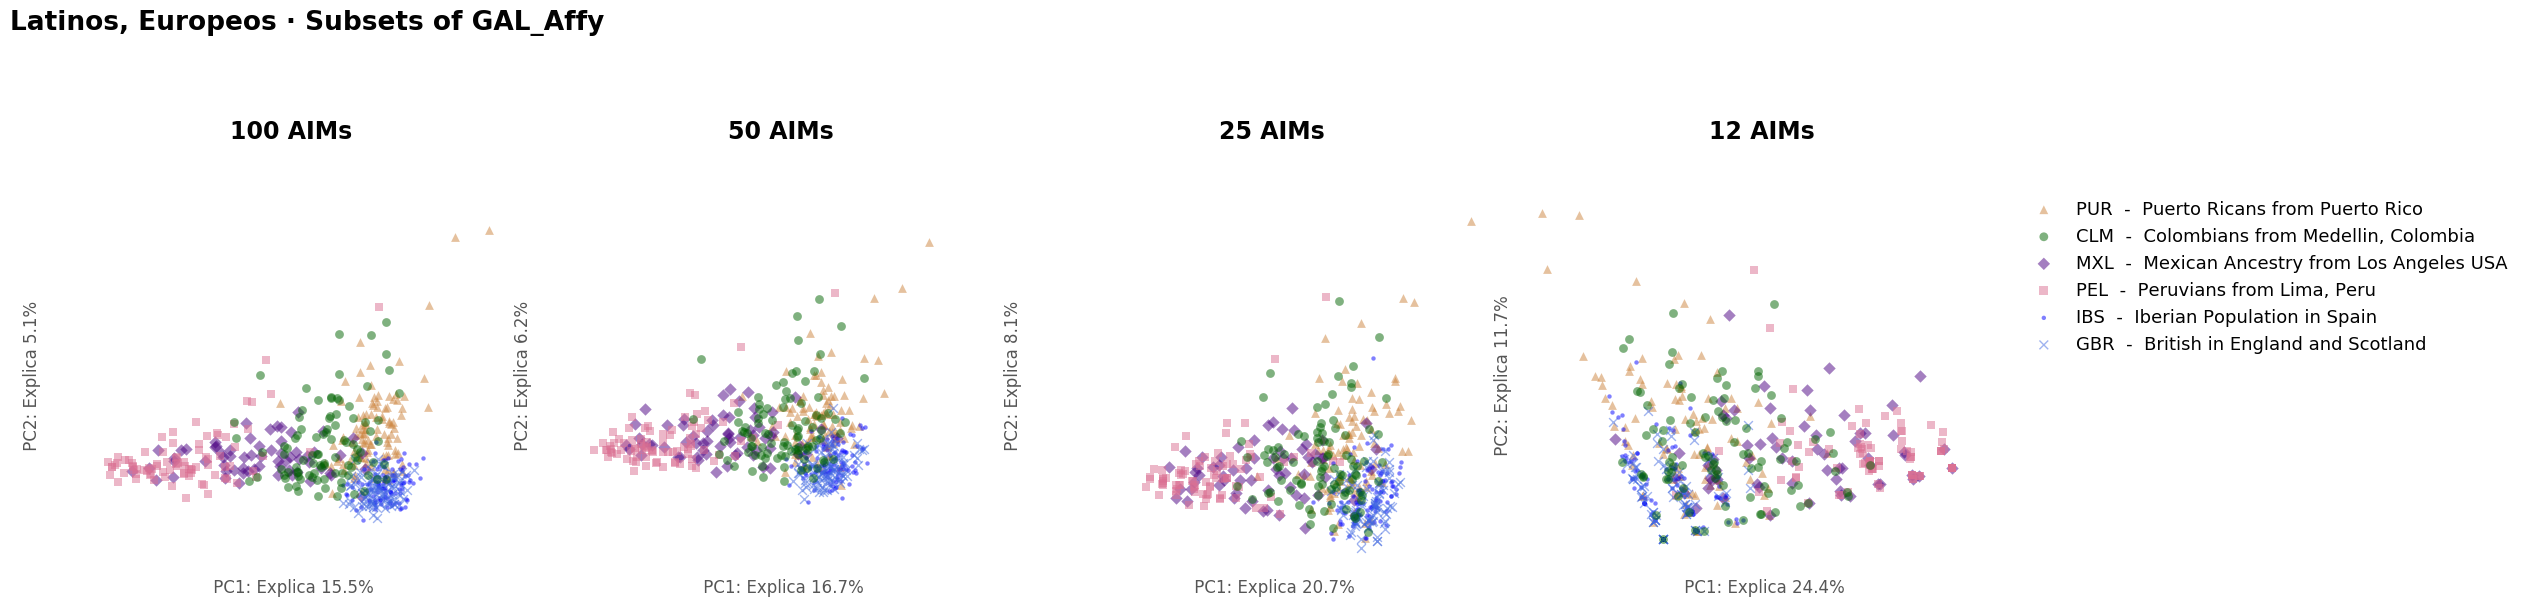

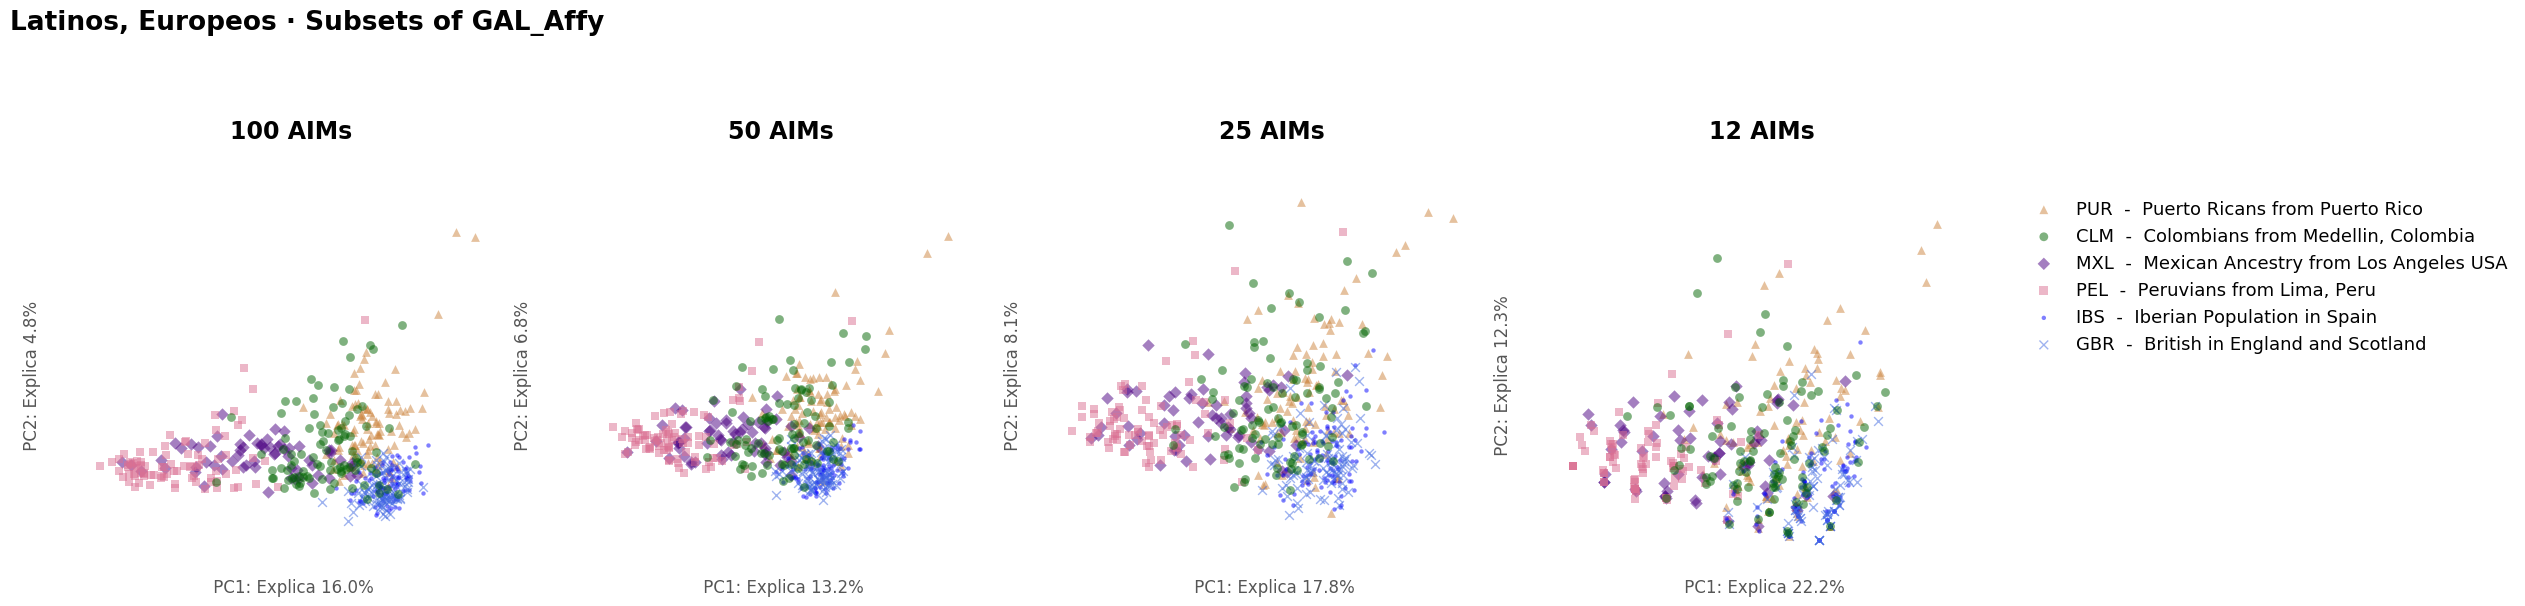

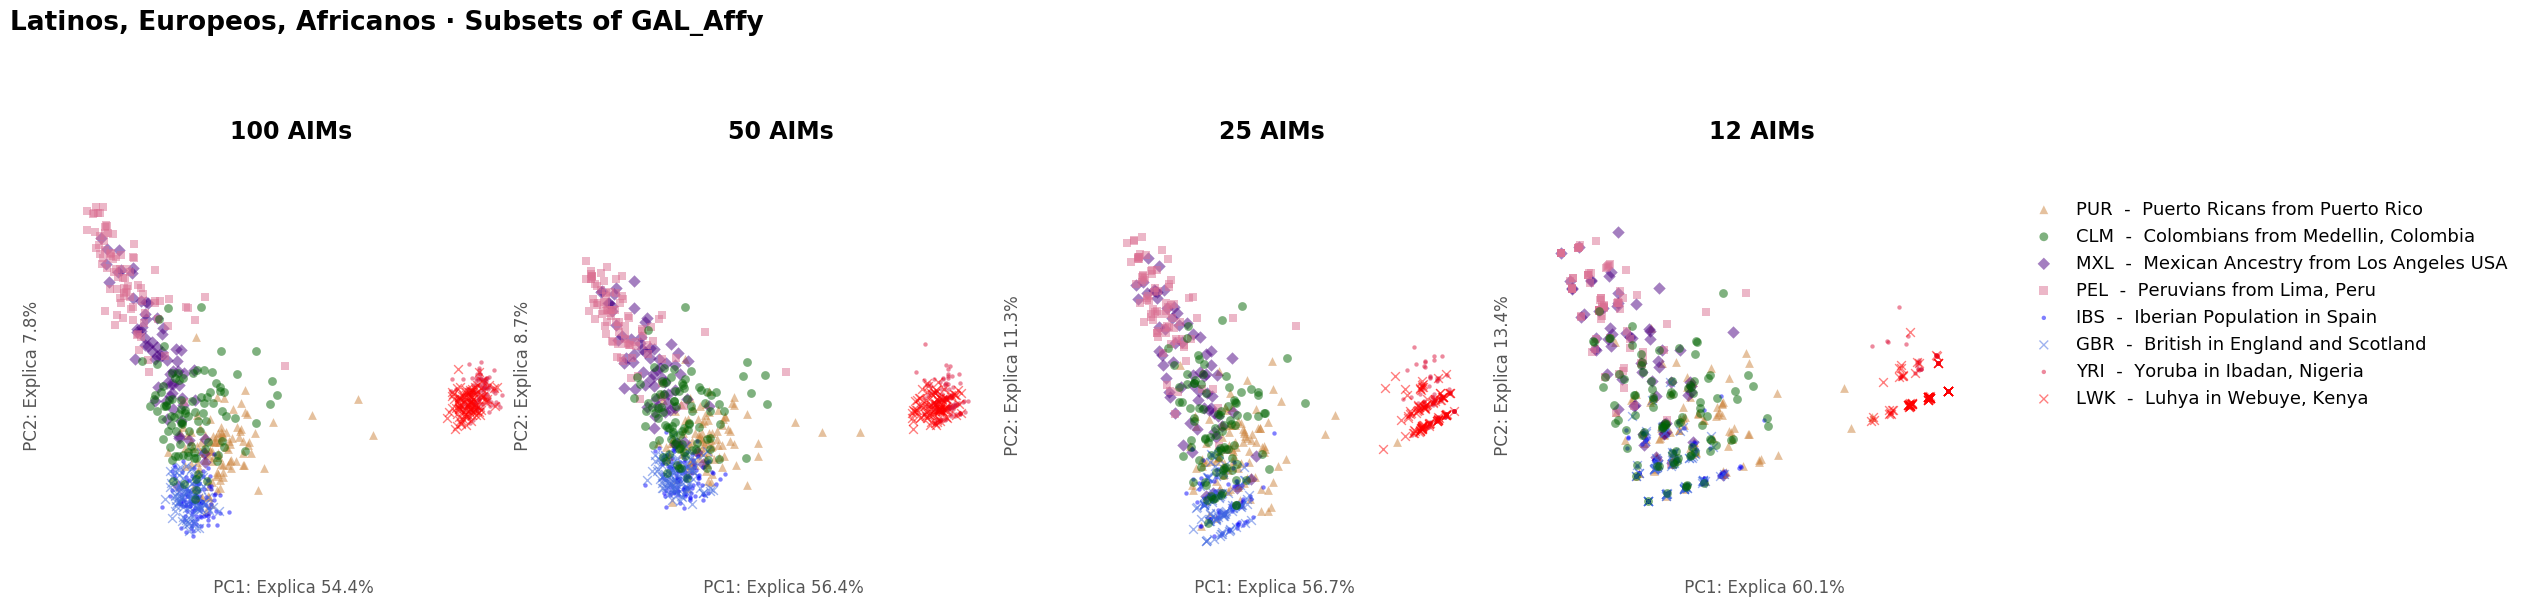

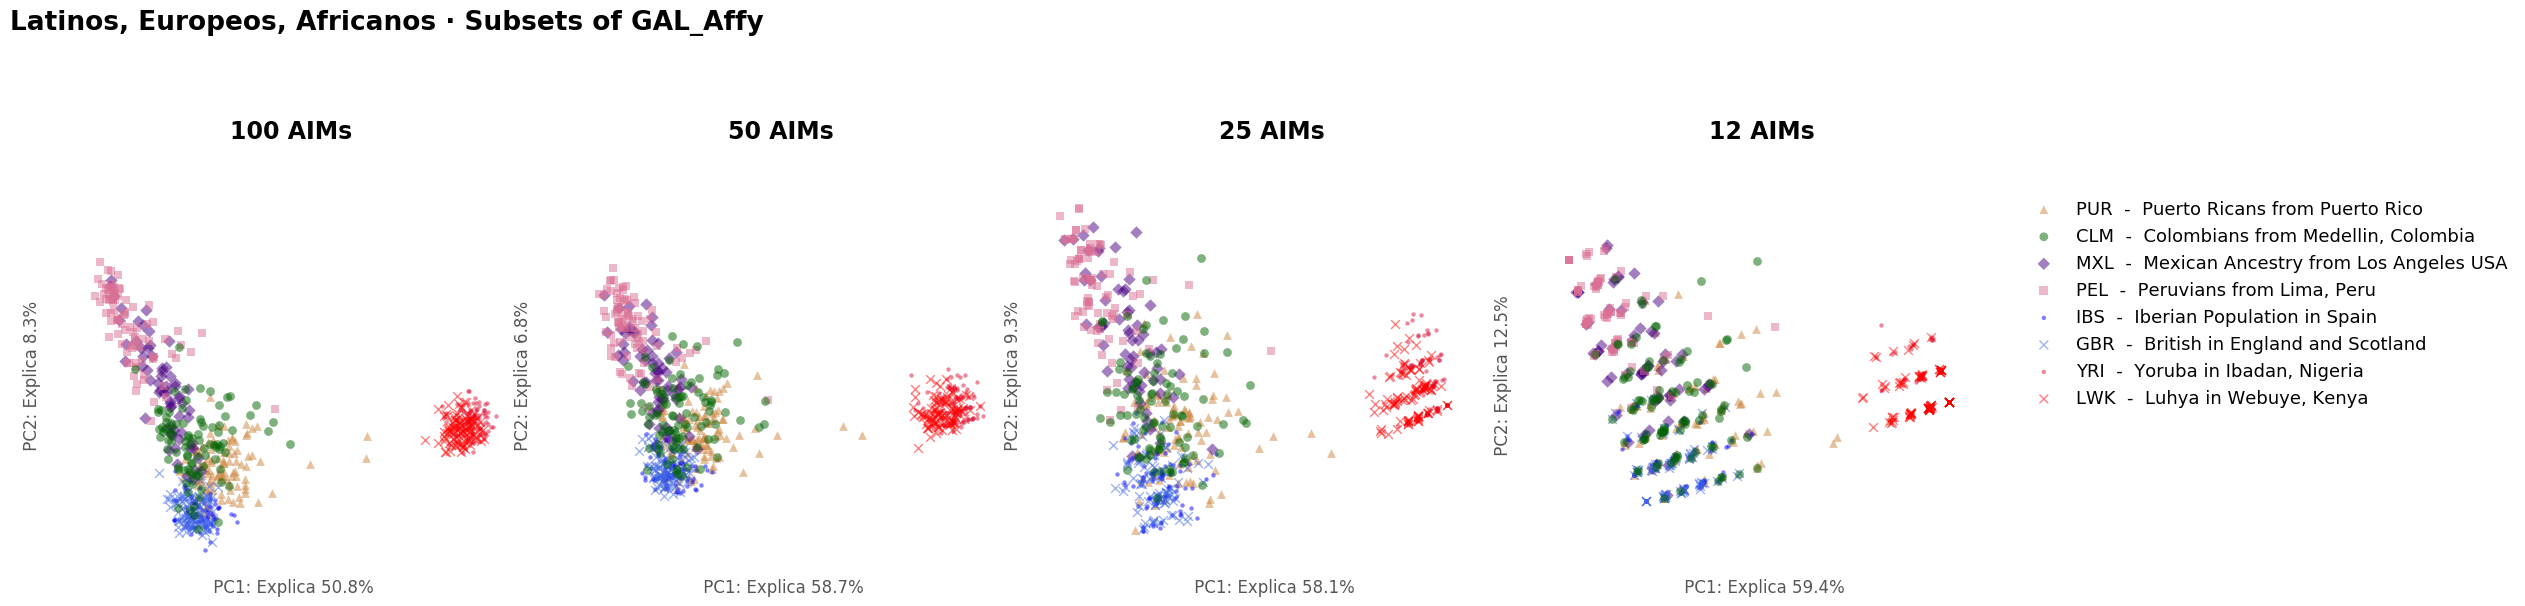

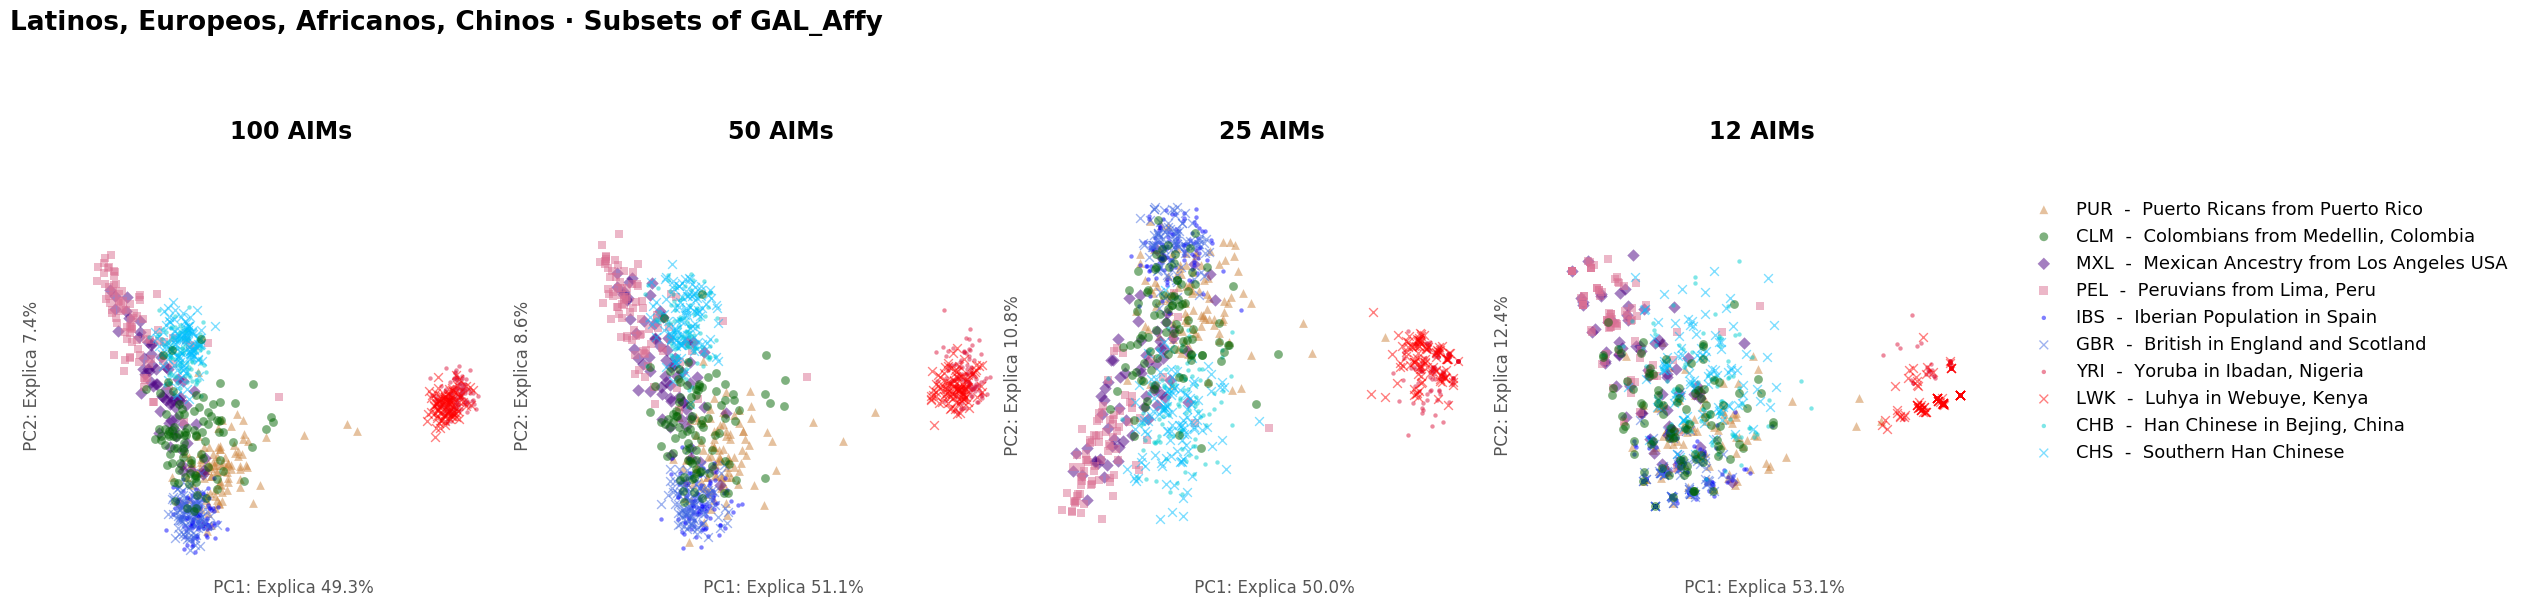

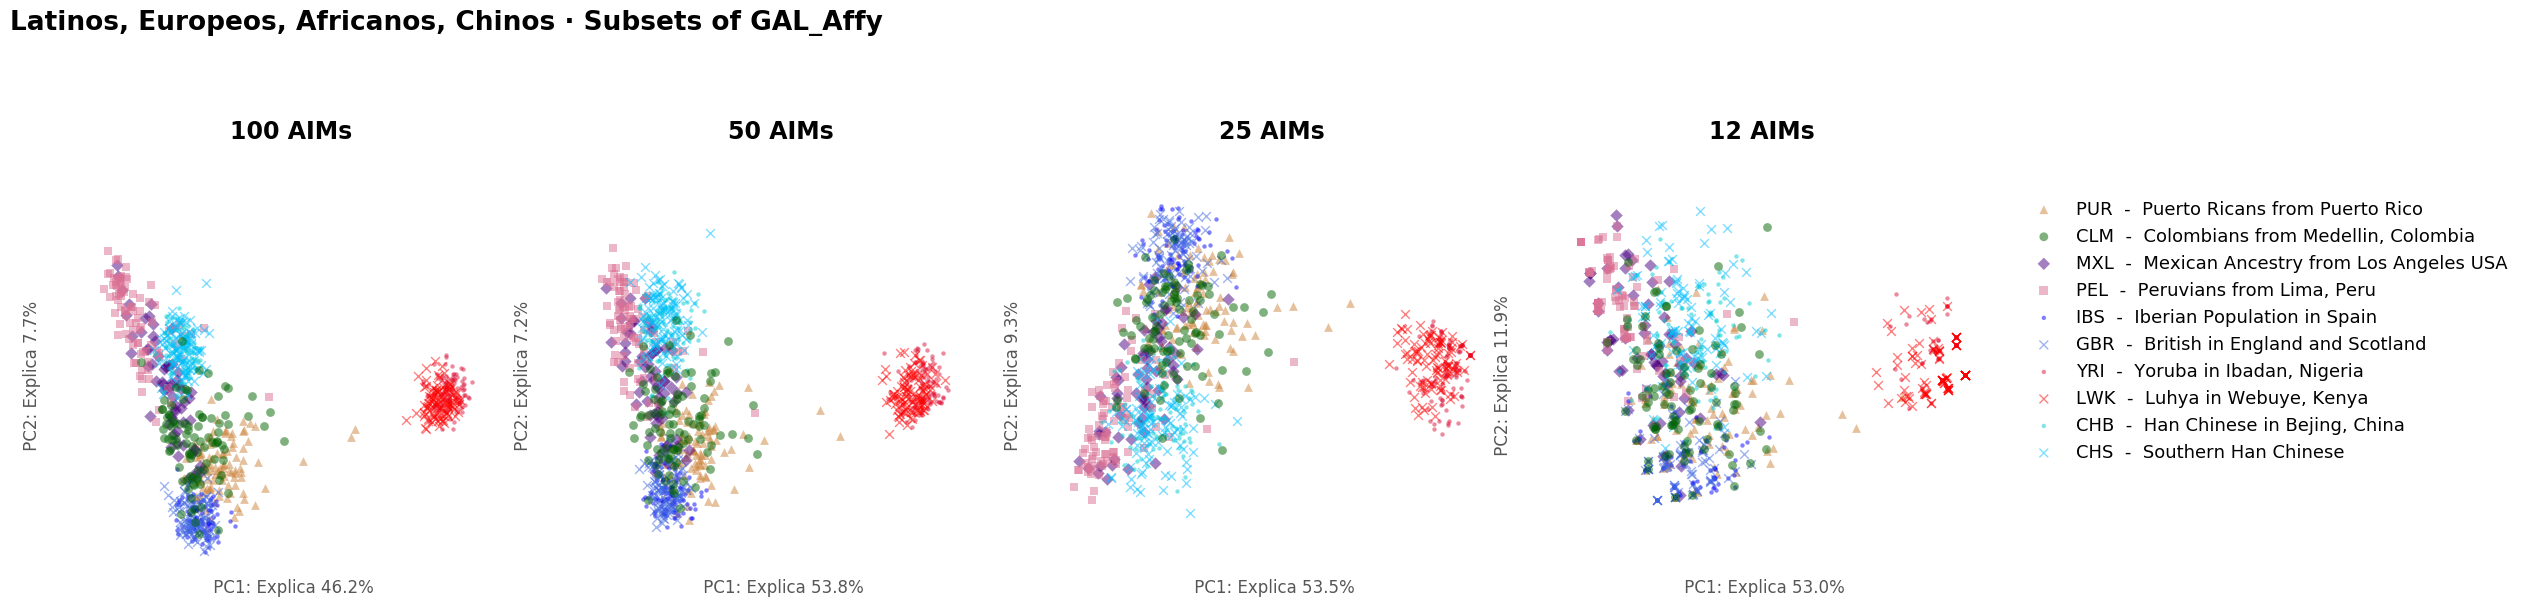

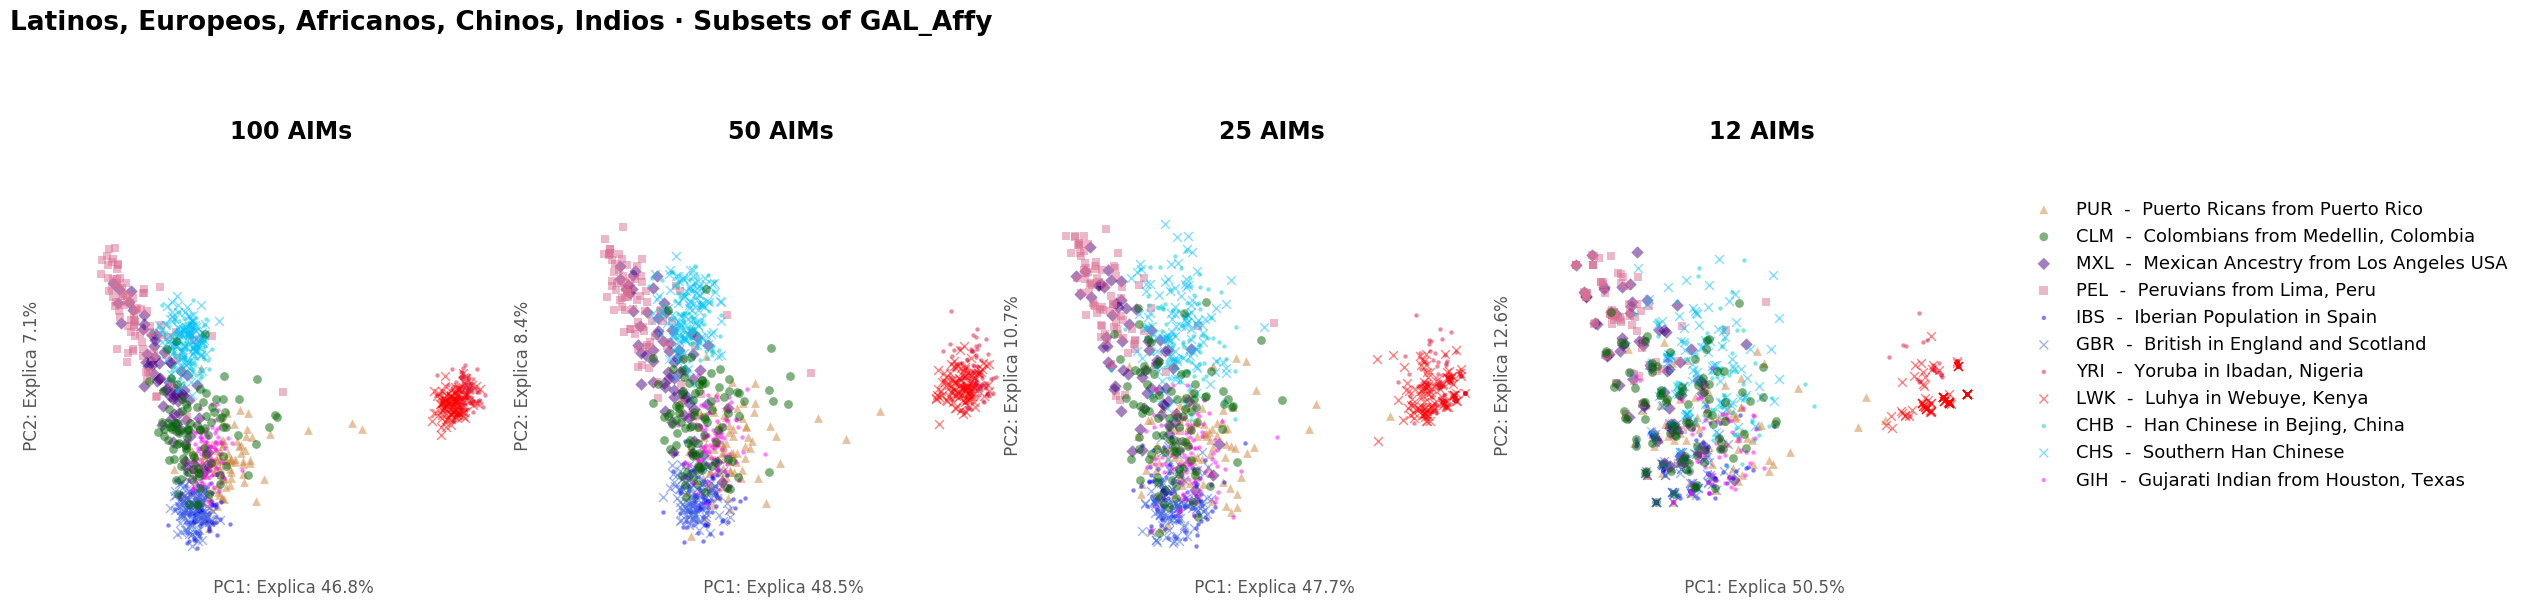

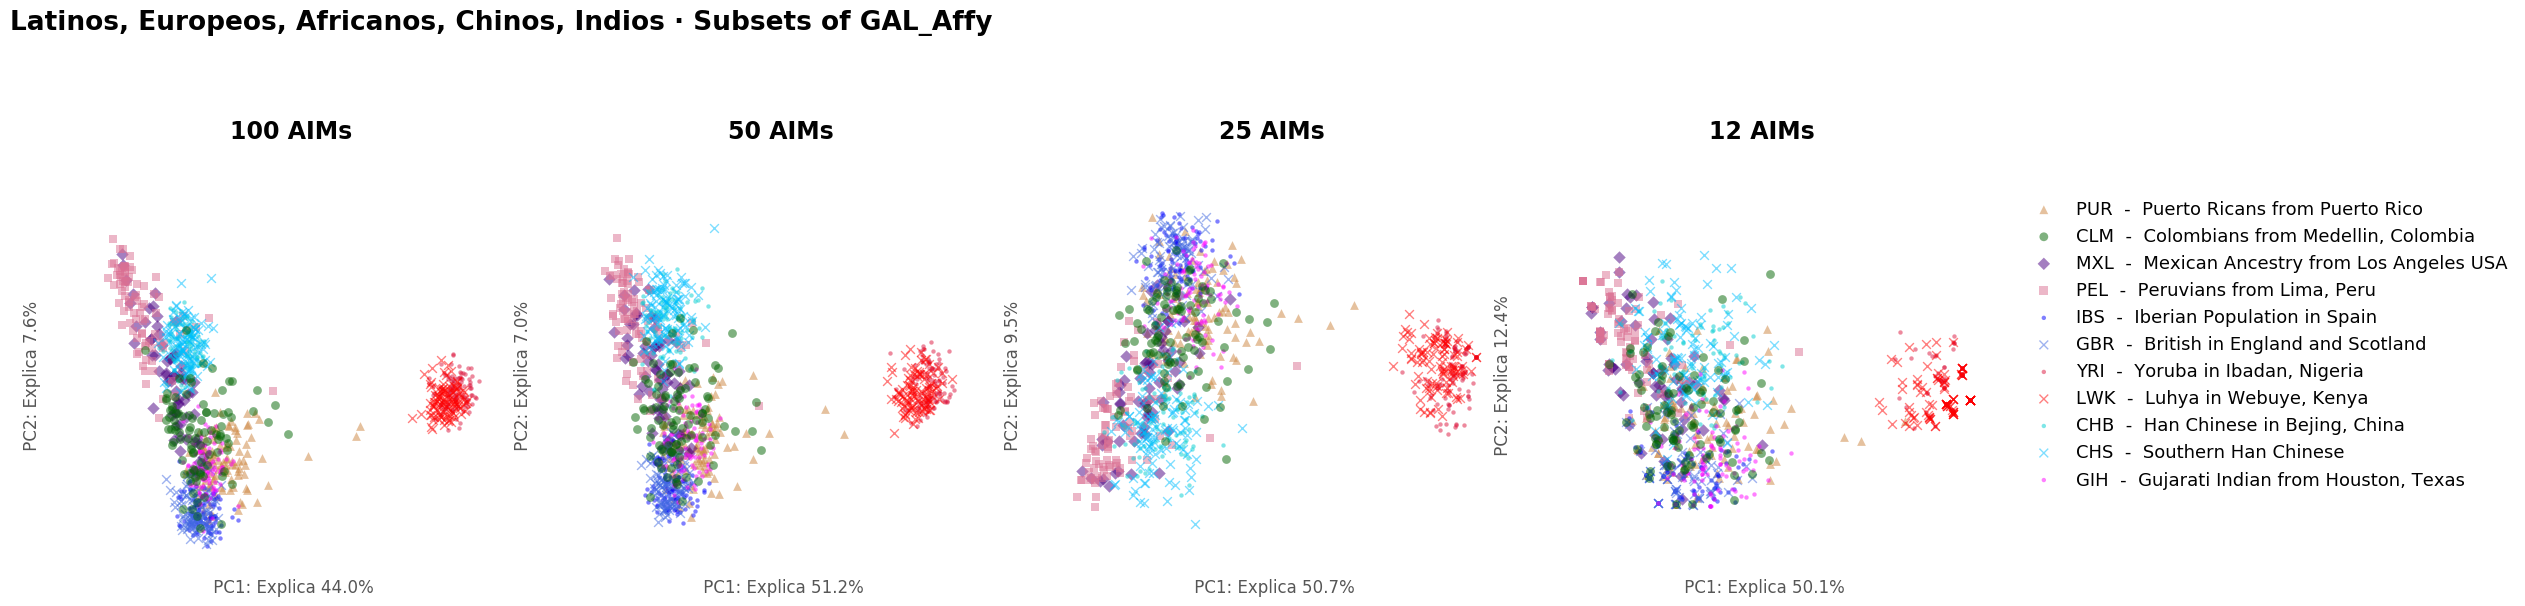

In [79]:
from panels.panel_creator import PanelCreator
from plotters.pca import PCAPlotter
from helpers.plot_helpers import populations_plot_order

pca_plotter = PCAPlotter()
panel_creator = PanelCreator()
subpanel_lengths = [100, 50, 25, 12]

for dataset_label, sample_ids in dataset_samples.items():

    figtitle = "{} · Subsets of GAL_Affy".format(dataset_names[dataset_label])
    components_to_compare = [("PC1", "PC2")]

    for panel_label, panel in panels.items():
        subpanels_rsIDs = panel_creator.generate_subpanels(panel, subpanel_lengths)
        subpanel_names = {k: k for k in subpanels_rsIDs.keys()}  # This is silly

        filename = make_filename(dataset_label,
                                 ["{}_Subpanels".format(panel_label)],
                                 components_to_compare)

        pca_plotter.plot(figtitle, subpanels_rsIDs, df_1000G_genotypes,
                         df_1000G_samples.ix[sample_ids], components_to_compare, subpanel_names,
                         filename, dataset_populations[dataset_label], normalize=True)